<IPython.core.display.Javascript object>


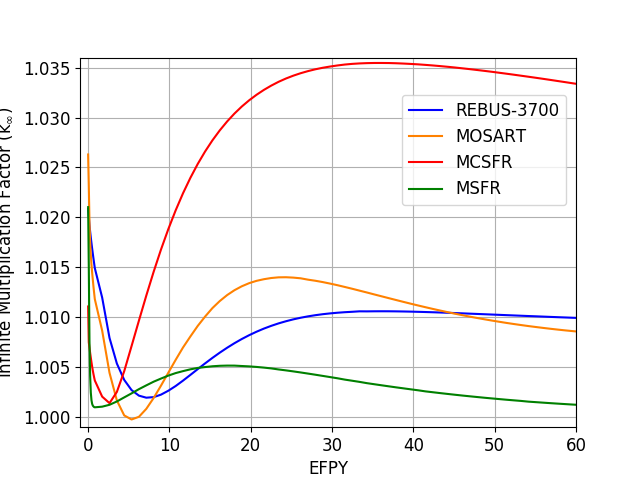

In [5]:
%matplotlib notebook 
# Import modules
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import itertools
#matplotlib.pyplot.rcParams["font.family"] = "Times New Roman"
matplotlib.pyplot.rcParams["font.size"] = 12

k_file_rebus         = '/home/andrei2/Desktop/forAndrei/rebus5/rebus_60yrs_4.out'
k_file_mosart        = '/home/andrei2/Desktop/forAndrei/mosart14/mosart_60yrs.out'
k_file_mcsfr         = '/home/andrei2/Desktop/forAndrei/mcsfr13/mcsfr_all_removal_u_feed_60yrs.out'
k_file_msfr          = '/home/andrei2/Desktop/forAndrei/msfr16(14)/msfr_all_removal_th_feed_60yrs_2.out'

filename_fuel  = '/home/andrei2/Desktop/forAndrei/rebus5/rebus_60yrs_4.000000000000000000.plt'

def read_scale_out (filename):
    iso       = []
    adens     = []
    days_list = []
    with open(filename,'r') as infile:
        for line in itertools.islice(infile, 5, None):  # Skip file header start=6, stop=None
            p = line.split()
            iso.append(str(p[0]))
            adens.append(p[1:])  
            #iso.append(str(p[2]))
            #adens.append(str(p[3]))
    #u_en = 1e-6* np.flip (np.array (upp_enrg, dtype=float), 0 )               # Convert eV to MeV
    #flux = np.flip ( np.array (flux_list, dtype=float), 0 )
    #num_gr = len (u_en)
    days_list.append (iso[0])
    days_list = days_list + adens[0][:]
    adens_arr = np.asarray(adens[1:][:], dtype=np.float32)
    days = np.array (days_list, dtype=np.float32)
    return iso[1:], days/365, adens_arr/1e+6

def read_scale_k (filename):
    kinf = []
    with open(filename) as openfile:
        for line in openfile:
            if line.startswith('      Infinite neutron multiplication'):
                num = line.split(' ')[-1].strip()
                kinf.append(float(num))
    return kinf   # kinf[1:] for all my runs

def mass_of_elements (n_sc, mdens, vol, list_of_elements):
    mass = []
    for k in list_of_elements:
        for g in range(len(n_sc)-2):
            if nucname.znum(k) == nucname.znum(n_sc[g]):
                mass.append(mdens[g,-1]*vol )
    return sum (mass)                          # total mass, t


kinf_rebus  = read_scale_k (k_file_rebus)
kinf_mosart = read_scale_k (k_file_mosart)
kinf_mcsfr  = read_scale_k (k_file_mcsfr)
kinf_msfr   = read_scale_k (k_file_msfr)
n_sc, days_sc, mdens_fuel_sc          = read_scale_out (filename_fuel)

# Initialize figure
fig_2 = matplotlib.pyplot.figure(1)
ax = fig_2.add_subplot(111)
ax.grid(True)
#ax.plot(days_sc, kinf_rebus, '-',color='blue',label="REBUS-3700", marker="o", markevery=12)
#ax.plot(days_sc, kinf_mosart, '-',color='#ff8100', label="MOSART", marker="s", markevery=11)
#ax.plot(days_sc, kinf_mcsfr, '-',color='red', label="MCSFR", marker="X", markevery=11)
#ax.plot(days_sc, kinf_msfr, '-',color='green', label="MSFR", marker="v", markevery=11)
ax.plot(days_sc, kinf_rebus, '-',color='blue',label="REBUS-3700")
ax.plot(days_sc, kinf_mosart, '-',color='#ff8100', label="MOSART")
ax.plot(days_sc, kinf_mcsfr, '-',color='red', label="MCSFR")
ax.plot(days_sc, kinf_msfr, '-',color='green', label="MSFR")
ax.legend(bbox_to_anchor=(0.98, 0.75), loc=7, borderaxespad=0.)
ax.set_ylabel(r'Infinite Multiplication Factor (k$_{\infty}$)')
ax.set_xlabel('EFPY')
#ax.set_title('Infinite muliplication factor')
#ax.set_xlim([-1,np.amax(days_sc)])
ax.set_xlim([-1,60])
ax.set_ylim([0.999, 1.036])
fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2019-rykhl-fsmsrs-mc-1/pres/images/k_inf.png',bbox_inches='tight', dpi=900)